<a href="https://colab.research.google.com/github/s-woelfel/obds_linux/blob/main/PDPN_seurat_with_batch_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Get the current working directory
current_working_directory = os.getcwd()

# Print the current working directory
print(f"The current working directory is: {current_working_directory}")

In [ ]:
# Run this in a Python code cell at the beginning of your notebook.
# This connects your Colab environment to your Google Drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Run this in an R code cell.
# This sets up your persistent R package library on Google Drive.

# Define the path to your desired R package library on Google Drive.
# IMPORTANT: You can change 'my_R_packages' to any folder name you prefer.
my_drive_r_lib_path <- "/content/drive/MyDrive/my_R_packages"

# Create the directory on Google Drive if it doesn't already exist.
# 'recursive = TRUE' creates parent directories if needed.
# 'showWarnings = FALSE' prevents warnings if the directory already exists.
dir.create(my_drive_r_lib_path, recursive = TRUE, showWarnings = FALSE)

# Add your custom path to R's library search paths.
# By placing it first, R will look here for packages before default locations.
.libPaths(c(my_drive_r_lib_path, .libPaths()))

# Verify that your custom path is now at the top of the library paths.
.libPaths()

[1] "/content/drive/MyDrive/my_R_packages"
[2] "/usr/local/lib/R/site-library"       
[3] "/usr/lib/R/site-library"             
[4] "/usr/lib/R/library"

In [ ]:
# Run this in an R code cell.
# Example: Installing Seurat and its dependencies.

# Ensure 'remotes' is installed if you need to install from GitHub (e.g., scCustomize)
if (!requireNamespace("remotes", quietly = TRUE)) {
    install.packages("remotes", lib = my_drive_r_lib_path)
}

# Install your necessary packages.
# R will automatically install them into 'my_drive_r_lib_path' because of Step 2.
install.packages("Seurat", lib = my_drive_r_lib_path)
install.packages("patchwork", lib = my_drive_r_lib_path)
install.packages("ggplot2", lib = my_drive_r_lib_path)
install.packages("dplyr", lib = my_drive_r_lib_path)
install.packages("hdf5r", lib = my_drive_r_lib_path)

# Install SeuratWrappers from GitHub (using a potentially more stable branch)
remotes::install_github("satijalab/seurat-wrappers@community-vignette", lib = my_drive_r_lib_path)
# If that gives an error related to R version, try:
# remotes::install_github("satijalab/seurat-wrappers@seurat5")

# If you need scCustomize again, it will also install to the correct path
remotes::install_github("samuel-marsh/scCustomize", force = TRUE, build_vignettes = FALSE, lib = my_drive_r_lib_path)

# You can omit the 'lib = my_drive_r_lib_path' argument for install.packages()
# IF you have run .libPaths(c(my_drive_r_lib_path, .libPaths())) correctly before.
# However, explicitly stating 'lib' can be a good safeguard.

also installing the dependencies ‘bitops’, ‘dotCall64’, ‘gtools’, ‘caTools’, ‘plyr’, ‘tensor’, ‘BH’, ‘sitmo’, ‘sp’, ‘spam’, ‘globals’, ‘listenv’, ‘parallelly’, ‘zoo’, ‘lazyeval’, ‘crosstalk’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘spatstat.data’, ‘spatstat.univar’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leidenbase’, ‘lmtest’, ‘matrixStats’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘progressr’, ‘RANN’, ‘RcppAnnoy’, ‘RcppHNSW’, ‘reticulate’, ‘ROCR’, ‘RSpectra’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘spatstat.explore’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’


Warning message:
“package ‘ggplt2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://c

curl        (6.2.3 -> 6.3.0  ) [CRAN]
rsvd        (NA    -> 1.0.5  ) [CRAN]
BiocManager (NA    -> 1.30.26) [CRAN]


Installing 3 packages: curl, rsvd, BiocManager



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpAQQhdo/remotesa637d161588/satijalab-seurat-wrappers-582039d/DESCRIPTION’ ... OK
* preparing ‘SeuratWrappers’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘SeuratWrappers_0.2.0.tar.gz’



vipor        (NA -> 0.4.7  ) [CRAN]
beeswarm     (NA -> 0.4.0  ) [CRAN]
prismatic    (NA -> 1.1.2  ) [CRAN]
snakecase    (NA -> 0.11.1 ) [CRAN]
ggbeeswarm   (NA -> 0.7.2  ) [CRAN]
Cairo        (NA -> 1.6-2  ) [CRAN]
colorspace   (NA -> 2.1-1  ) [CRAN]
shape        (NA -> 1.4.6.1) [CRAN]
GlobalOpt... (NA -> 0.1.2  ) [CRAN]
paletteer    (NA -> 1.6.0  ) [CRAN]
janitor      (NA -> 2.2.1  ) [CRAN]
ggrastr      (NA -> 1.0.2  ) [CRAN]
ggprism      (NA -> 1.0.6  ) [CRAN]
circlize     (NA -> 0.4.16 ) [CRAN]


Installing 14 packages: vipor, beeswarm, prismatic, snakecase, ggbeeswarm, Cairo, colorspace, shape, GlobalOptions, paletteer, janitor, ggrastr, ggprism, circlize



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpAQQhdo/remotesa632c83e664/samuel-marsh-scCustomize-3299b95/DESCRIPTION’ ... OK
* preparing ‘scCustomize’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘scCustomize_3.0.1.tar.gz’



In [ ]:
install.packages("ggplot2", lib = my_drive_r_lib_path)
install.packages("dplyr", lib = my_drive_r_lib_path)

For every other session, start code from here on; packages should be downloaded in drive

In [ ]:
# Run this in a Python code cell at the beginning of your notebook.
# This connects your Colab environment to your Google Drive.

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Run this in an R code cell.
# This sets up your persistent R package library on Google Drive.

# Define the path to your desired R package library on Google Drive.
# IMPORTANT: You can change 'my_R_packages' to any folder name you prefer.
my_drive_r_lib_path <- "/content/drive/MyDrive/my_R_packages"

# Create the directory on Google Drive if it doesn't already exist.
# 'recursive = TRUE' creates parent directories if needed.
# 'showWarnings = FALSE' prevents warnings if the directory already exists.
dir.create(my_drive_r_lib_path, recursive = TRUE, showWarnings = FALSE)

# Add your custom path to R's library search paths.
# By placing it first, R will look here for packages before default locations.
.libPaths(c(my_drive_r_lib_path, .libPaths()))

# Verify that your custom path is now at the top of the library paths.
.libPaths()

In [ ]:
# Now, load all the necessary libraries
library(Seurat)
library(SeuratWrappers)
library(patchwork)
library(ggplot2)
library(dplyr)
library(scCustomize) # Ensure this is loaded for Read_CellBender_H5

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


scCustomize v3.0.1
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.



In [ ]:
setwd("/content/Objects/")
getwd()

[1] "/content/Objects"

In [ ]:
# Assuming your previous installation and library calls were successful

# Use the correct argument name: file_name
counts_HET_1 <- Read_CellBender_h5_Mat(file_name = "HET_FRI3112307.h5")
counts_HET_2 <- Read_CellBender_h5_Mat(file_name = "HET_FRI3112308.h5")
counts_HET_3 <- Read_CellBender_h5_Mat(file_name = "HET_FRI3112309.h5")
counts_HET_4 <- Read_CellBender_h5_Mat(file_name = "HET_FRI3112404.h5")

counts_WT_1 <- Read_CellBender_h5_Mat(file_name = "WT_FRI3112304.h5")
counts_WT_2 <- Read_CellBender_h5_Mat(file_name = "WT_FRI3112305.h5")
counts_WT_3 <- Read_CellBender_h5_Mat(file_name = "WT_FRI3112306.h5")
counts_WT_4 <- Read_CellBender_h5_Mat(file_name = "WT_FRI3112311.h5")
counts_WT_5 <- Read_CellBender_h5_Mat(file_name = "WT_FRI3112405.h5")
counts_WT_6 <- Read_CellBender_h5_Mat(file_name = "WT_FRI3112406.h5")
counts_WT_7 <- Read_CellBender_h5_Mat(file_name = "WT_FRI3112407.h5")

In [ ]:
# Function to create Seurat object and add metadata
# Now includes min.features filter for cells
create_seurat_object_with_metadata <- function(counts_matrix, sample_id, group_id) {
  obj <- CreateSeuratObject(
    counts = counts_matrix,
    project = sample_id,
    min.features = 200 # Include cells with at least 200 features detected
    # We will apply min.cells (feature filter) after merging
  )

  # Add sample and group metadata
  obj$sample_id <- sample_id
  obj$group <- group_id

  # (Optional, but good practice for QC later)
  # Calculate mitochondrial percentage if you know the pattern (e.g., "^mt-")
  obj[["percent.mt"]] <- PercentageFeatureSet(obj, pattern = "^mt-")

  return(obj)
}

# --- Create HET Seurat Objects (now with min.features = 200 applied to each cell) ---
het_1 <- create_seurat_object_with_metadata(counts_HET_1, "HET_FRI3112307", "HET")
het_2 <- create_seurat_object_with_metadata(counts_HET_2, "HET_FRI3112308", "HET")
het_3 <- create_seurat_object_with_metadata(counts_HET_3, "HET_FRI3112309", "HET")
het_4 <- create_seurat_object_with_metadata(counts_HET_4, "HET_FRI3112404", "HET")

# --- Create WT Seurat Objects (now with min.features = 200 applied to each cell) ---
wt_1 <- create_seurat_object_with_metadata(counts_WT_1, "WT_FRI3112304", "WT")
wt_2 <- create_seurat_object_with_metadata(counts_WT_2, "WT_FRI3112305", "WT")
wt_3 <- create_seurat_object_with_metadata(counts_WT_3, "WT_FRI3112306", "WT")
wt_4 <- create_seurat_object_with_metadata(counts_WT_4, "WT_FRI3112311", "WT")
wt_5 <- create_seurat_object_with_metadata(counts_WT_5, "WT_FRI3112405", "WT")
wt_6 <- create_seurat_object_with_metadata(counts_WT_6, "WT_FRI3112406", "WT")
wt_7 <- create_seurat_object_with_metadata(counts_WT_7, "WT_FRI3112407", "WT")

# Optional: You can put them into a list for easier management
# This list will now contain Seurat objects that have already had cells with <200 features removed
seurat_objects_list <- list(
  het_1, het_2, het_3, het_4,
  wt_1, wt_2, wt_3, wt_4, wt_5, wt_6, wt_7
)


In [ ]:
# ... (your code to create individual Seurat objects and seurat_objects_list) ...

# MERGE ALL OBJECTS and NAME THE RESULT 'seurat_object'
seurat_object <- merge(
  x = seurat_objects_list[[1]],
  y = seurat_objects_list[-1],
  add.cell.ids = c("HET_1", "HET_2", "HET_3", "HET_4",
                   "WT_1", "WT_2", "WT_3", "WT_4", "WT_5", "WT_6", "WT_7")
)

# --- NEW STEP: Join the 'counts' layers in the RNA assay ---
# This consolidates all individual sample count layers into a single 'counts' layer
seurat_object <- JoinLayers(object = seurat_object, assay = "RNA", layers = "counts")

# --- Now, apply the min.cells filter to the MERGED 'seurat_object' ---
# IMPORTANT: Also update 'slot' to 'layer' as per the warning
seurat_object <- subset(
  seurat_object,
  features = names(
    which(
      rowSums(
        GetAssayData(seurat_object, assay = "RNA", layer = "counts") > 0 # Changed 'slot' to 'layer'
      ) >= 3
    )
  )
)

# Now, 'seurat_object' is your final, merged, and initially filtered object.
print(seurat_object)

An object of class Seurat 
27232 features across 83726 samples within 1 assay 
Active assay: RNA (27232 features, 0 variable features)
 1 layer present: counts


In [ ]:
# Save to your Google Colab session's temporary storage (NOT persistent)
saveRDS(seurat_object, file = "my_seurat_object.rds")
print("Seurat object saved to current Colab session folder as 'my_seurat_object.rds'")


[1] "Seurat object saved to current Colab session folder as 'my_seurat_object.rds'"


Start code here for loading seurat object

In [ ]:
setwd("/content/Objects")
getwd()

[1] "/content/Objects"

In [ ]:
seurat_object <- readRDS(file = "my_seurat_object.rds")

In [ ]:
print(seurat_object)

An object of class Seurat 
27232 features across 83726 samples within 1 assay 
Active assay: RNA (27232 features, 0 variable features)
 1 layer present: counts


Output of the the print command should look like this:

An object of class Seurat
27232 features across 83726 samples within 1 assay
Active assay: RNA (27232 features, 0 variable features)
 1 layer present: counts

In [ ]:
head(seurat_object@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_id,group,percent.mt
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
HET_1_CCTTCGAGTCCTGCTT-1,HET_FRI3112307,81362,8116,HET_FRI3112307,HET,2.662176
HET_1_GTCTCGTCAGACGTAG-1,HET_FRI3112307,80405,5204,HET_FRI3112307,HET,1.583235
HET_1_GTCATTTGTCAACTGT-1,HET_FRI3112307,76029,6518,HET_FRI3112307,HET,1.624380
HET_1_GCTGCAGGTAAAGTCA-1,HET_FRI3112307,72712,7030,HET_FRI3112307,HET,1.306524
HET_1_TGCGTGGGTGTAATGA-1,HET_FRI3112307,70089,6679,HET_FRI3112307,HET,2.023142
HET_1_GAAGCAGCAACACCTA-1,HET_FRI3112307,69895,5565,HET_FRI3112307,HET,1.386365


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


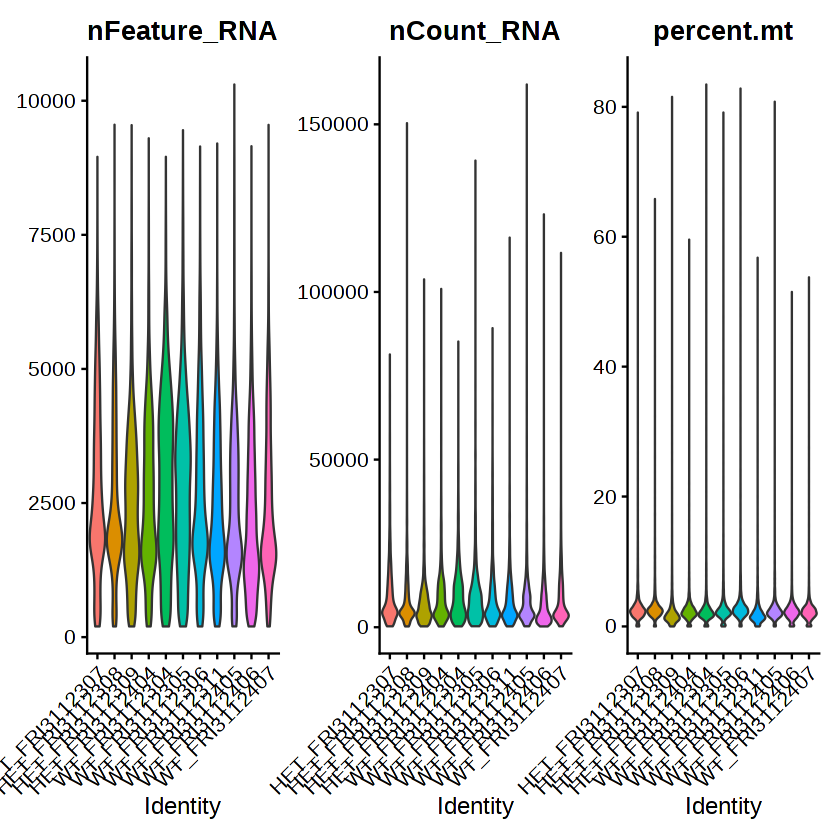

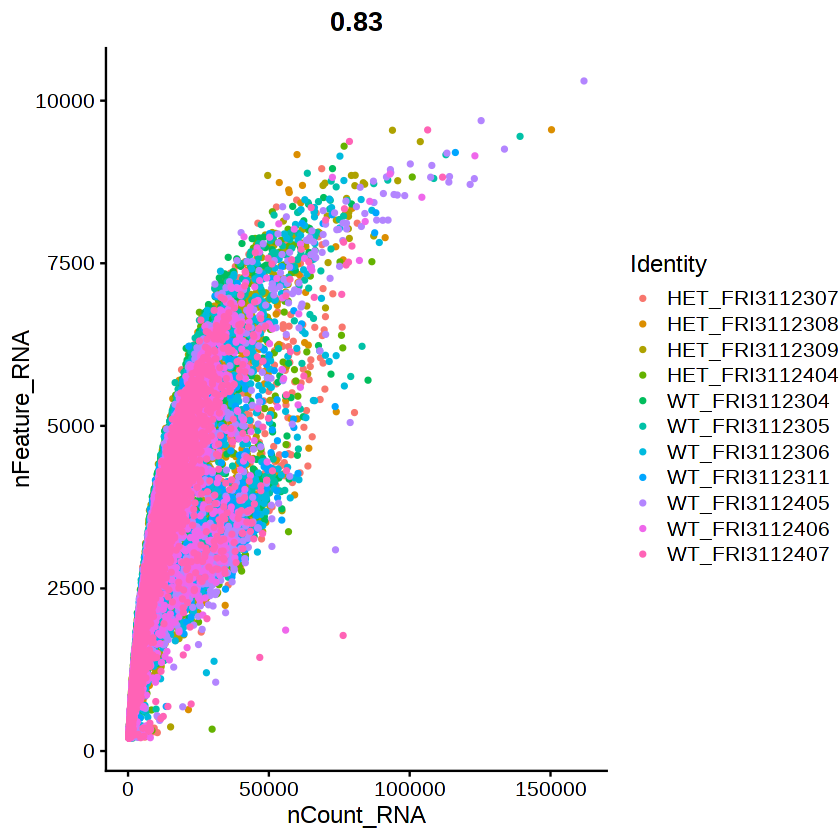

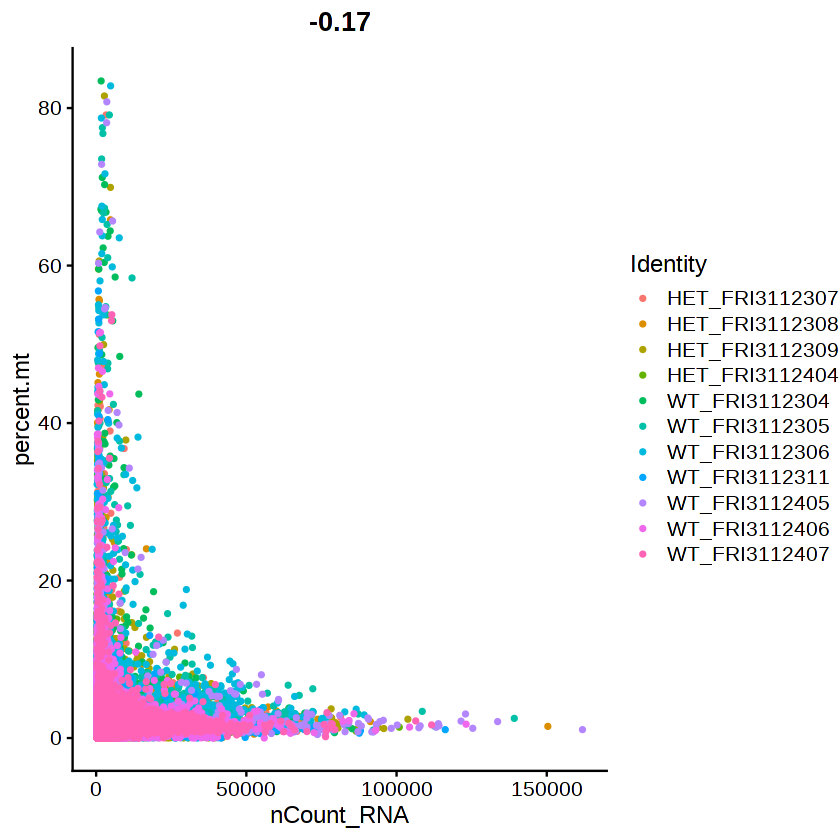

In [ ]:
VlnPlot(seurat_object, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0)
FeatureScatter(seurat_object, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
FeatureScatter(seurat_object, feature1 = "nCount_RNA", feature2 = "percent.mt")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


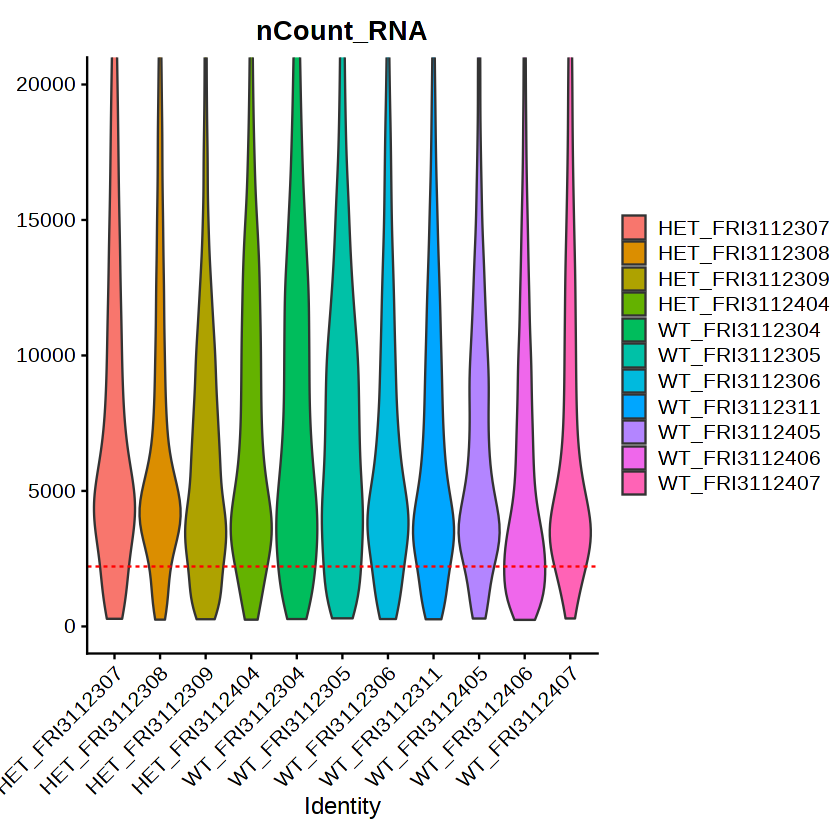

In [ ]:
VlnPlot(seurat_object, features = "nCount_RNA", pt.size = 0) +
  coord_cartesian(ylim = c(0, 20000)) + # Adjust these min and max values as needed
  geom_hline(yintercept = 2200, linetype = "dashed", color = "red") # Draws a dashed red line at y=1000

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


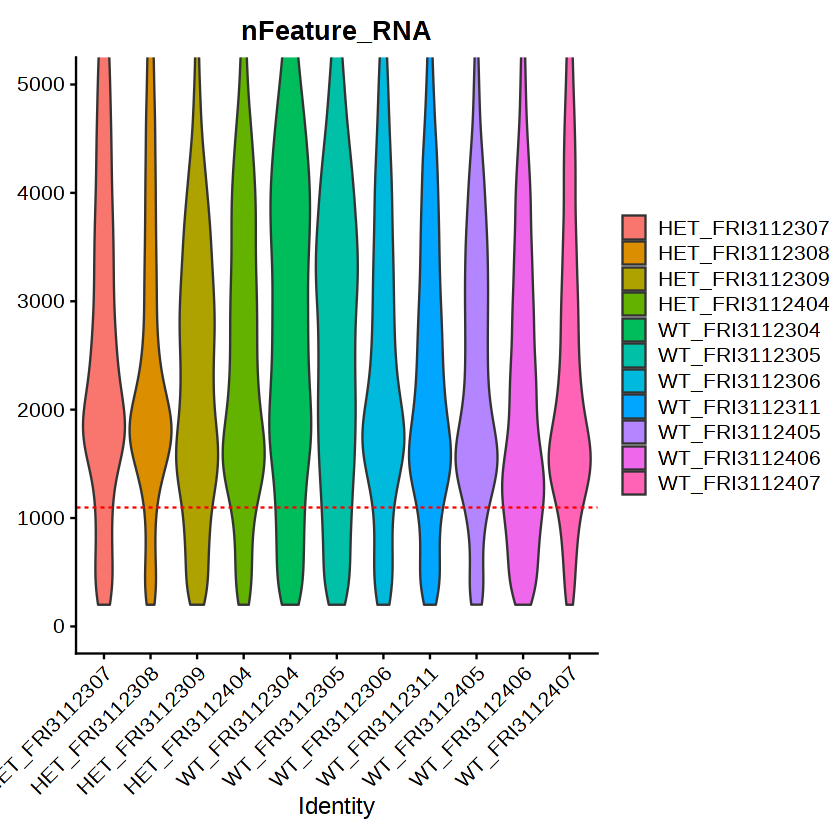

In [ ]:
VlnPlot(seurat_object, features = "nFeature_RNA", pt.size = 0) +
  coord_cartesian(ylim = c(0, 5000)) + # Adjust these min and max values as needed
  geom_hline(yintercept = 1100, linetype = "dashed", color = "red") # Draws a dashed red line at y=1000

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


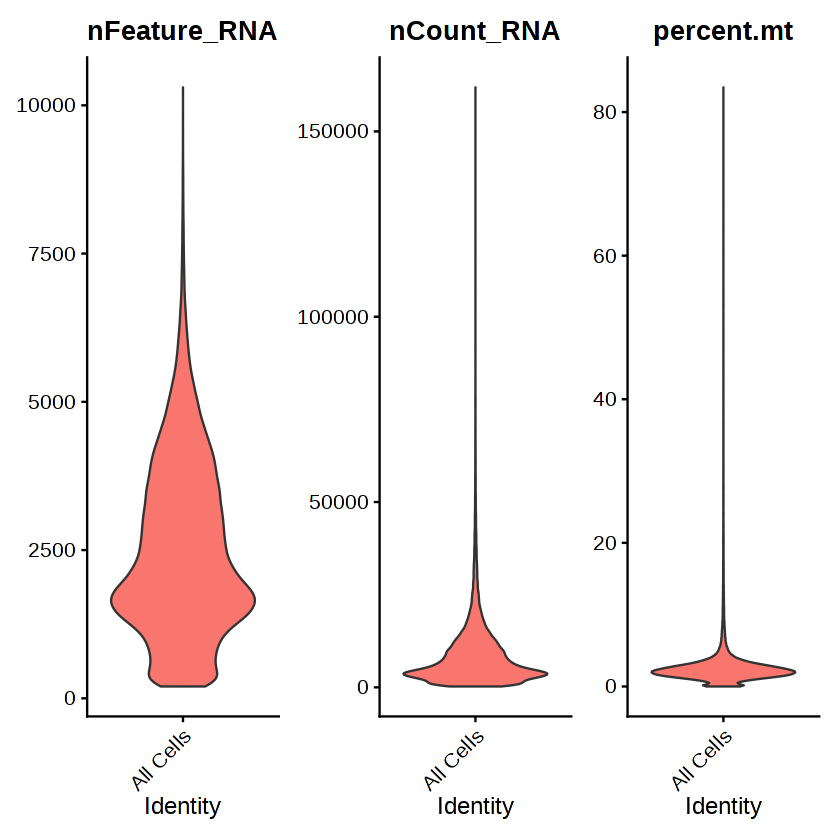

In [ ]:
# Add a new metadata column that groups all cells together
# We'll call this column 'all_cells' and set its value to 'All Cells' for every cell
seurat_object$all_cells <- "All Cells"

# Now, use VlnPlot and tell it to group by this new 'all_cells' column
VlnPlot(seurat_object, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"),
        ncol = 3, pt.size = 0, group.by = "all_cells")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


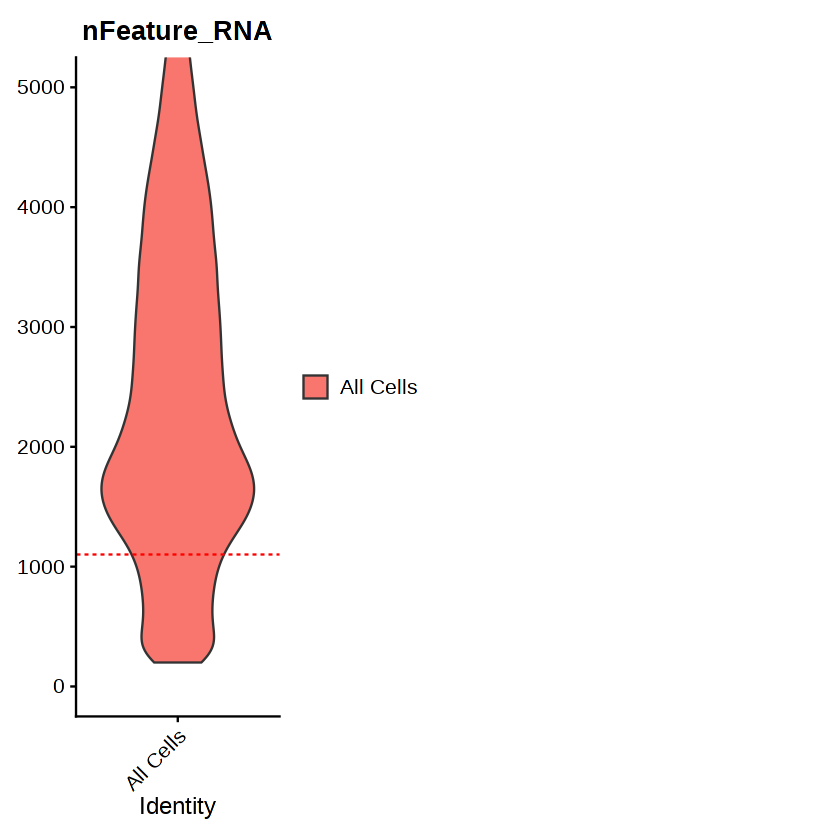

In [ ]:
# Add a new metadata column that groups all cells together
# We'll call this column 'all_cells' and set its value to 'All Cells' for every cell
seurat_object$all_cells <- "All Cells"

# Now, use VlnPlot and tell it to group by this new 'all_cells' column
VlnPlot(seurat_object, features = c("nFeature_RNA"),
        ncol = 3, pt.size = 0, group.by = "all_cells")+
  coord_cartesian(ylim = c(0, 5000)) + # Adjust these min and max values as needed
  geom_hline(yintercept = 1100, linetype = "dashed", color = "red") # Draws a dashed red line at y=1000

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


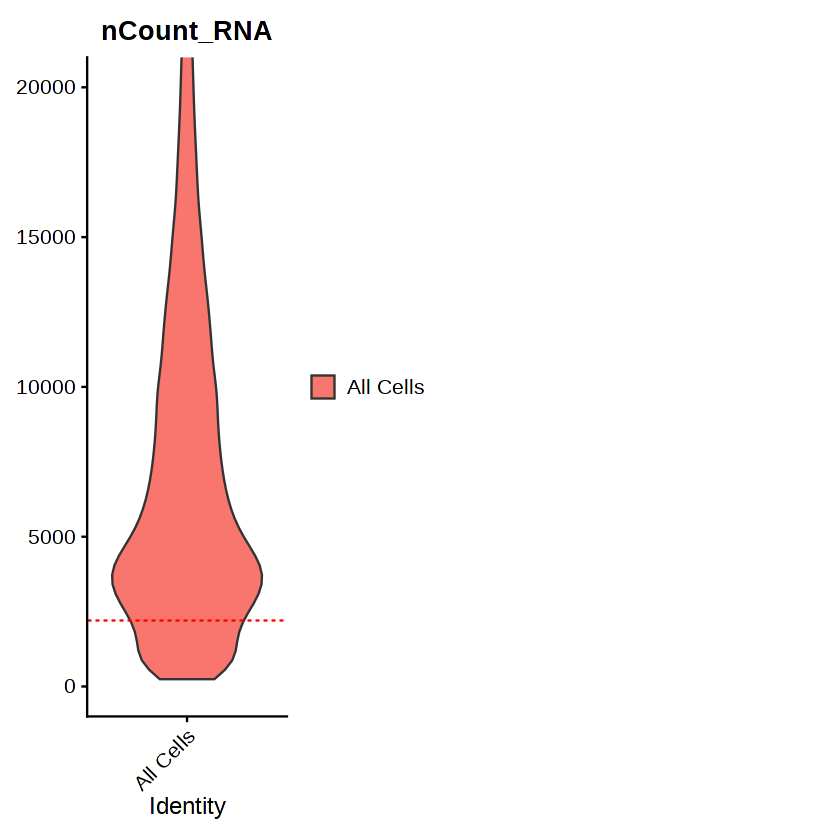

In [ ]:
# Add a new metadata column that groups all cells together
# We'll call this column 'all_cells' and set its value to 'All Cells' for every cell
seurat_object$all_cells <- "All Cells"

# Now, use VlnPlot and tell it to group by this new 'all_cells' column
VlnPlot(seurat_object, features = c("nCount_RNA"),
        ncol = 3, pt.size = 0, group.by = "all_cells")+
  coord_cartesian(ylim = c(0, 20000)) + # Adjust these min and max values as needed
  geom_hline(yintercept =2200, linetype = "dashed", color = "red") # Draws a dashed red line at y=1000

In [ ]:
seurat_after_qc <- subset(
  x = seurat_object,
  subset = nCount_RNA > 2200 & nCount_RNA < 80000 &
           percent.mt < 15 &
           nFeature_RNA > 1100 & nFeature_RNA < 9000
)

In [ ]:
original_cells <- ncol(seurat_object)
qc_cells <- ncol(seurat_after_qc)
cells_removed <- original_cells - qc_cells
cat("Number of cells removed during QC:", cells_removed, "\n")

Number of cells removed during QC: 14150 


In [ ]:
# Get the number of cells
num_cells <- ncol(seurat_object)

# Display the number of cells
print(paste("Your Seurat object has", num_cells, "cells."))

# Alternatively, you can just run ncol() directly:
# ncol(seurat_object)

[1] "Your Seurat object has 83726 cells."


In [ ]:
# Get the number of cells
num_cells <- ncol(seurat_after_qc)

# Display the number of cells
print(paste("Your Seurat object has", num_cells, "cells."))

# Alternatively, you can just run ncol() directly:
# ncol(seurat_object)

[1] "Your Seurat object has 69576 cells."


In [ ]:
seurat_after_qc_norm <- NormalizeData(
  object = seurat_after_qc,
  normalization.method = "LogNormalize",
  scale.factor = 10000 # This is the default scale factor used by 10x Genomics
)

Normalizing layer: counts



In [ ]:
seurat_after_qc_norm <- FindVariableFeatures(
  object = seurat_after_qc_norm,
  selection.method = "vst",  # Use the Variance Stabilizing Transformation method
  nfeatures = 2000           # Select the top 2,000 most variable features
)
head(VariableFeatures(seurat_after_qc_norm))

Finding variable features for layer counts



[1] "Igkv1-110"  "Ighv7-3"    "Igkv1-117"  "Igkv14-111" "Ighv1-9"   
[6] "Igkv10-96"

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


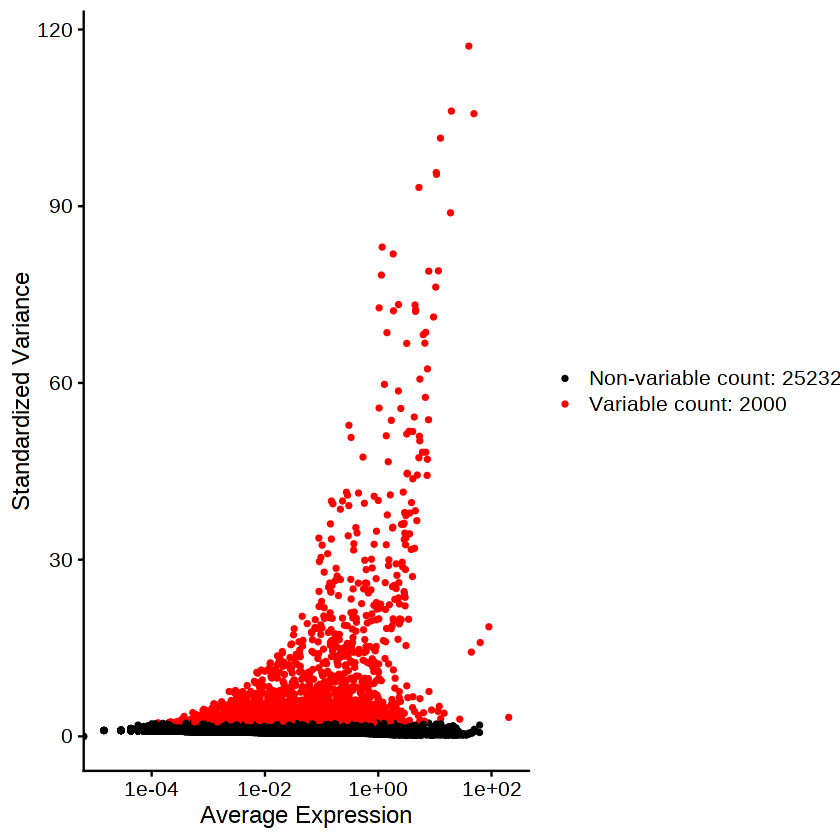

In [ ]:
plot1 <- VariableFeaturePlot(seurat_after_qc_norm)
plot1

In [ ]:
seurat_after_qc_norm <- ScaleData(
  object = seurat_after_qc_norm,
  vars.to.regress = "percent.mt" # Specify the variable to regress out
)

Regressing out percent.mt

Centering and scaling data matrix



In [ ]:
seurat_after_qc_norm <- RunPCA(
  object = seurat_after_qc_norm,
  features = VariableFeatures(seurat_after_qc_norm), # Use the previously identified variable features
  npcs = 50                                  # Optional: Compute the top 50 principal components (default)
)

PC_ 1 
Positive:  Cldn7, Lgals4, Krt8, Pigr, Cldn3, Muc13, Krt19, Epcam, Prss32, Tspan1 
	   Elf3, Gpx2, Gpa33, Rab25, Cdx1, Dsp, Fam3d, Ckmt1, Krt18, Cdh1 
	   Tmprss2, Esrp1, Phgr1, Ceacam1, Hnf4a, Tmem45b, Tstd1, Tspan8, Degs2, Vil1 
Negative:  Apoe, Ighm, Ccr7, Wdfy4, Ly6d, Mafb, Ccl8, Mrc1, Creb5, C1qc 
	   Bcl2a1b, Ms4a7, C1qa, Aoah, Ifi207, C1qb, Csf1r, Iglc2, Pou2af1, Iglc3 
	   Pf4, Lyz2, Mpeg1, Hdac9, Irf4, Ms4a4a, Gm30211, E330020D12Rik, Pkib, Nlrp3 
PC_ 2 
Positive:  Tpm1, Timp3, Mustn1, Mfge8, Tpm2, Cav1, Mylk, Dstn, Smtn, Myl9 
	   Acta2, Mgll, Pdlim3, Tm4sf1, Map1b, Tagln, Dmd, Adamts1, Sorbs1, Rbp4 
	   Cavin2, Bdkrb2, Hspb1, Myh11, Cdh13, Chsy3, Pgm5, Ly6c1, Slc24a3, Schip1 
Negative:  Bcl2a1b, Bcl2a1d, Il1b, Plbd1, Lyz2, Mpeg1, Nlrp3, Rgs1, Csf1r, Cd14 
	   Aif1, Csf2rb, Wfdc17, Clec7a, Fcgr3, Alox5ap, Arl5c, Hmgb2, Ms4a4a, Cd300a 
	   Il1rn, Cfp, Clec4n, Il1r2, Ifi207, Bcl2a1a, Ccr2, Wdfy4, Ccl6, C1qb 
PC_ 3 
Positive:  Lyz2, Nlrp3, Csf1r, Cd14, Il1b, Fcgr3, Wfdc17, 

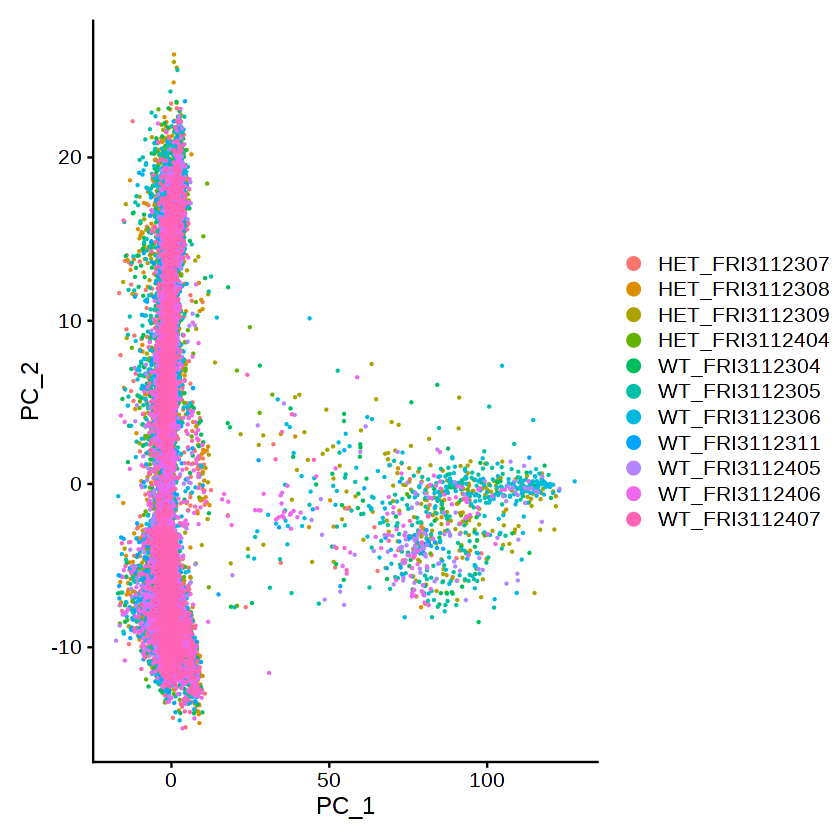

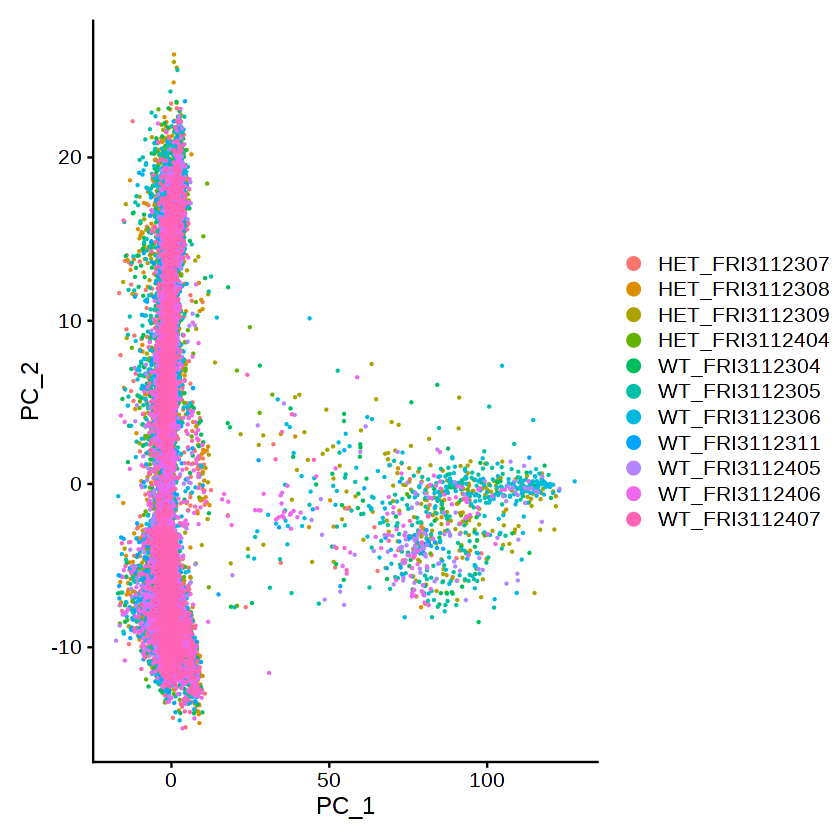

In [ ]:
DimPlot(
  object = seurat_after_qc_norm,
  reduction = "pca", # Specify that you want to plot the PCA reduction
  dims = c(1, 2)     # Specify to plot PC1 on the x-axis and PC2 on the y-axis (default)
)

PCAPlot(
   object = seurat_after_qc_norm,
   dims = c(1, 2) # Specify to plot PC1 on the x-axis and PC2 on the y-axis (default)
 )

Installing package into ‘/content/drive/MyDrive/my_R_packages’
(as ‘lib’ is unspecified)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




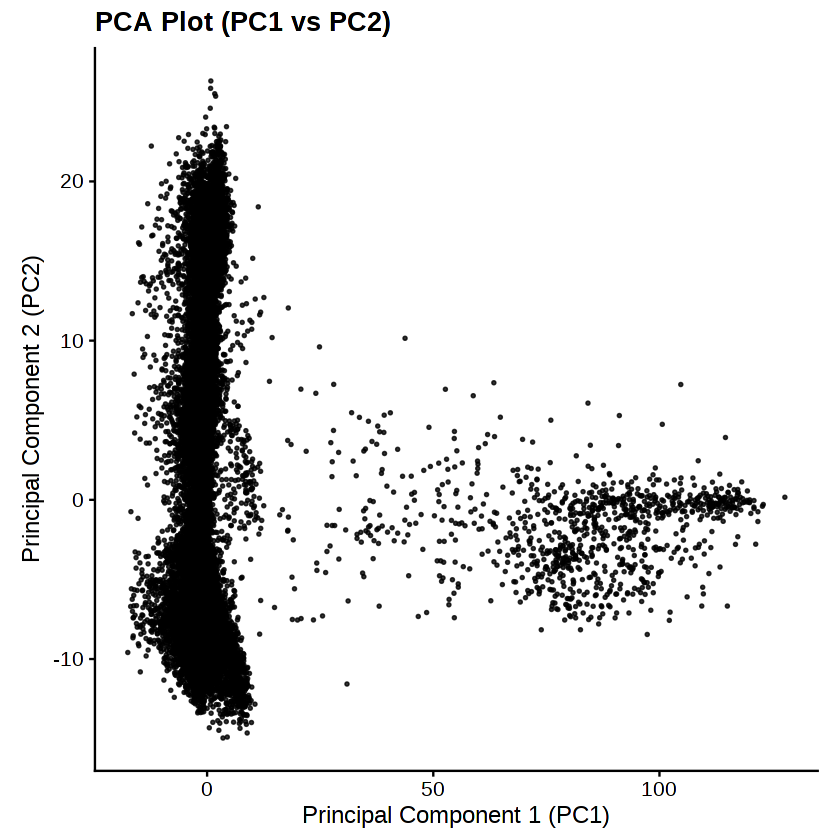

In [ ]:
install.packages("cowplot")
library(cowplot)

# Use this code chunk to prepare and display a data.frame for ggplot2 (use FetchData function)
pca_coords_df <- FetchData(seurat_after_qc_norm, vars = c("PC_1", "PC_2"))
ggplot(pca_coords_df, aes(x = PC_1, y = PC_2)) +
  geom_point(alpha = 0.8, size = 0.5) + # alpha for transparency, size for point size
  labs(title = "PCA Plot (PC1 vs PC2)",
       x = "Principal Component 1 (PC1)",
       y = "Principal Component 2 (PC2)") +
  theme_cowplot() + # A clean theme from cowplot
  theme(aspect.ratio = 1)

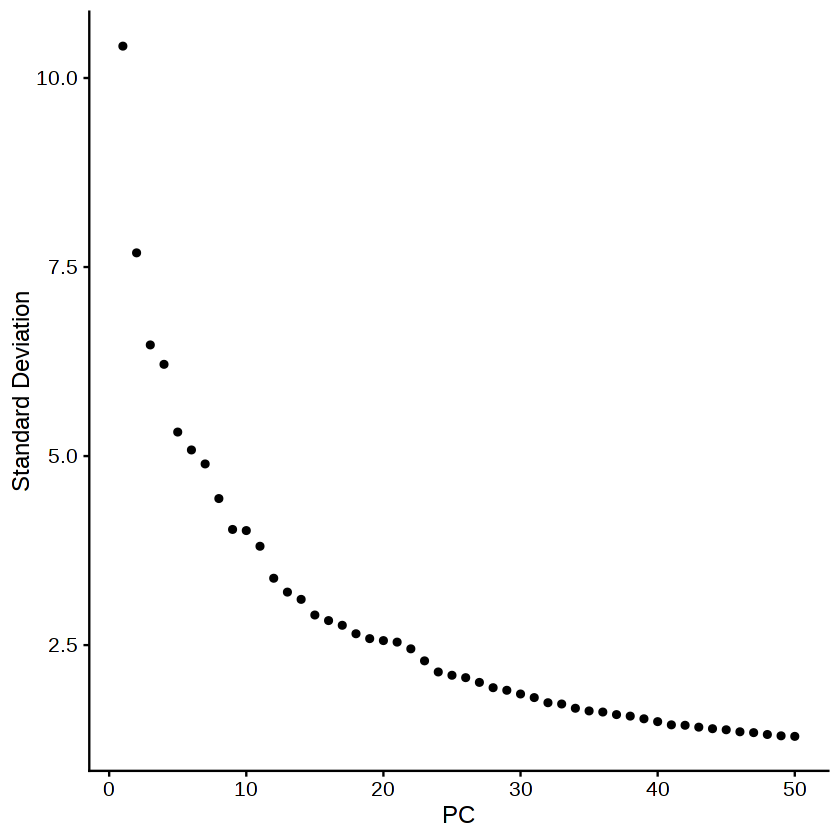

In [ ]:
ElbowPlot(
  object = seurat_after_qc_norm,
  ndims = 50 # Control the number of principal components to plot
)

In [ ]:
seurat_after_qc_norm <- RunUMAP(
  object = seurat_after_qc_norm,
  dims = 1:50 # Use the specified range of principal components as input
)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:07:01 UMAP embedding parameters a = 0.9922 b = 1.112

09:07:02 Read 69576 rows and found 50 numeric columns

09:07:02 Using Annoy for neighbor search, n_neighbors = 30

09:07:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:07:18 Writing NN index file to temp file /tmp/RtmpvEGBkQ/file9482682338f

09:07:18 Searching Annoy index using 1 thread, search_k = 3000

09:07:53 Annoy recall = 100%

09:07:54 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

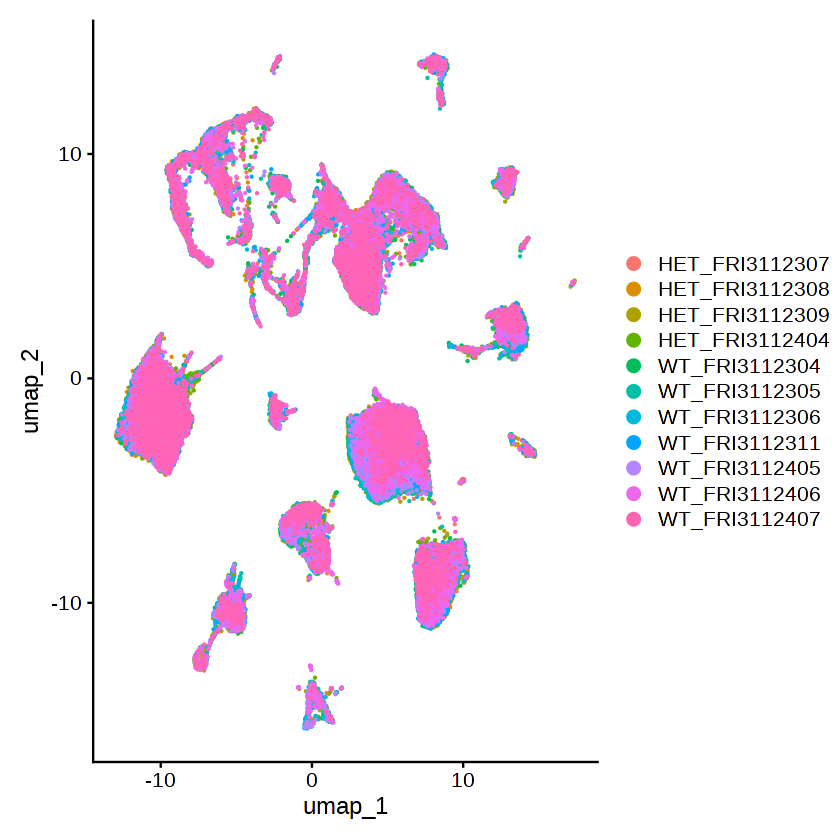

In [ ]:
UMAPPlot(
  object = seurat_after_qc_norm
  # Optionally, you can add arguments like:
  # group.by = "seurat_clusters" # To color cells by their cluster identity (after clustering)
   #label = TRUE                  # To add cluster labels directly to the plot
  # repel = TRUE                  # To repel overlapping labels
)

In [ ]:
seurat_after_qc_norm <- FindNeighbors(
  object = seurat_after_qc_norm,
  dims = 1:50 # Specify the principal components to use for graph construction
)

Computing nearest neighbor graph

Computing SNN



In [ ]:
available_graphs <- Graphs(seurat_after_qc_norm)
print(available_graphs)

[1] "RNA_nn"  "RNA_snn"


In [ ]:
seurat_after_qc_norm <- FindClusters(
  object = seurat_after_qc_norm,
  resolution = 0.2 # Set the resolution parameter for clustering
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 69576
Number of edges: 2597796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9765
Number of communities: 23
Elapsed time: 27 seconds


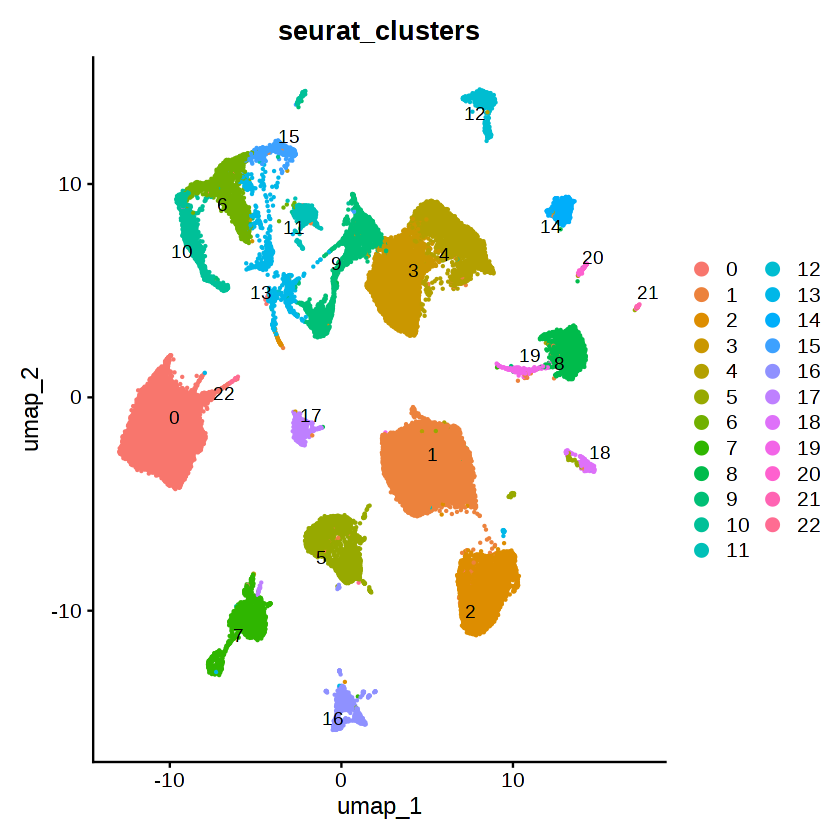

In [ ]:
UMAPPlot(
  object = seurat_after_qc_norm,
  group.by = "seurat_clusters", # Color cells by the 'seurat_clusters' metadata column
  label = TRUE,                # Display cluster labels directly on the plot
  repel = TRUE                 # Avoid overlapping labels (requires 'ggrepel' package)
)

In [ ]:
seurat_after_qc_norm <- FindClusters(
  object = seurat_after_qc_norm,
  resolution = 0.1 # Set the resolution parameter for clustering
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 69576
Number of edges: 2597796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9857
Number of communities: 17
Elapsed time: 29 seconds


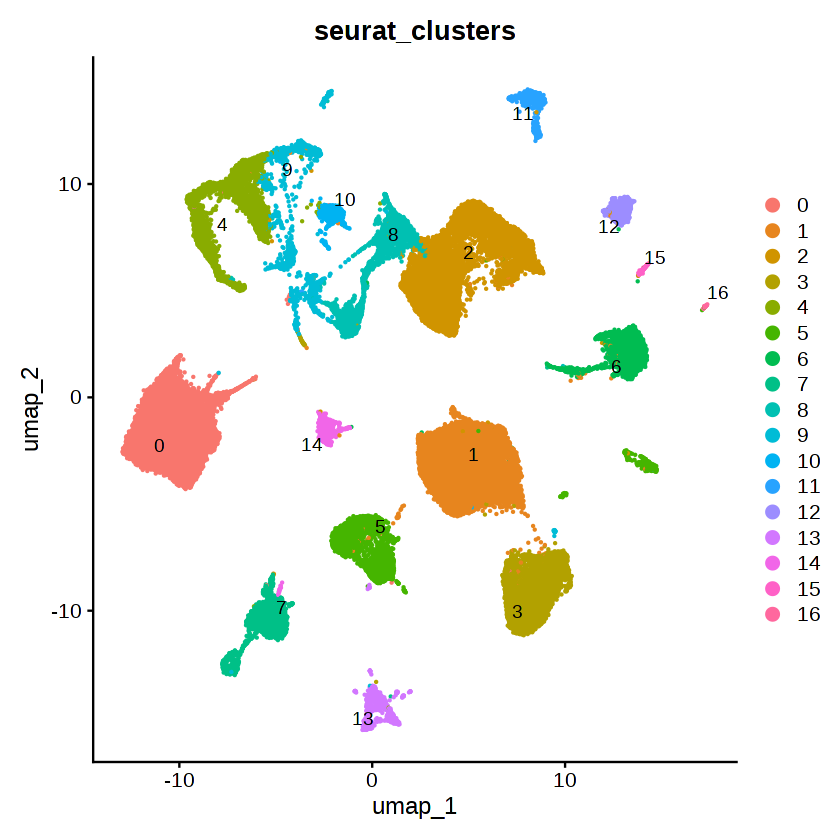

In [ ]:
UMAPPlot(
  object = seurat_after_qc_norm,
  group.by = "seurat_clusters", # Color cells by the 'seurat_clusters' metadata column
  label = TRUE,                # Display cluster labels directly on the plot
  repel = TRUE                 # Avoid overlapping labels (requires 'ggrepel' package)
)

In [ ]:
# 1. Install devtools (if you don't have it already)
# This is generally needed for installing packages from GitHub.
if (!requireNamespace("devtools", quietly = TRUE)) {
    install.packages("devtools")
}

# 2. Install the presto package using devtools
# This will significantly speed up FindMarkers() calls.
devtools::install_github('immunogenomics/presto')

# After installing presto, you don't need to do anything else.
# Seurat will automatically detect and use it for FindMarkers().

utf8   (1.2.5 -> 1.2.6) [CRAN]
tibble (3.2.1 -> 3.3.0) [CRAN]


Installing 2 packages: utf8, tibble

Installing packages into ‘/content/drive/MyDrive/my_R_packages’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpvEGBkQ/remotes94876f88e9/immunogenomics-presto-7636b3d/DESCRIPTION’ ... OK
* preparing ‘presto’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘presto_1.0.0.tar.gz’



Installing package into ‘/content/drive/MyDrive/my_R_packages’
(as ‘lib’ is unspecified)



In [ ]:
seurat_markers_all <- FindAllMarkers(
  object = seurat_after_qc_norm,
  only.pos = TRUE,           # Only report positive markers (genes upregulated in the cluster)
  min.pct = 0.25,            # Minimum percentage of cells in the cluster where the gene is detected
  logfc.threshold = 0.25     # Minimum log2 fold-change for a gene to be considered a marker
)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22



In [ ]:
library(dplyr)

top_25_logFC_markers_per_cluster <- seurat_markers_all %>%
  group_by(cluster) %>%
  slice_max(n = 25, order_by = avg_log2FC) %>% # Selects rows with the 25 highest avg_log2FC values
  ungroup()

print(top_25_logFC_markers_per_cluster)

# A tibble: 575 × 7
   p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene   
   <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>  
 1     0       6.98 0.749 0.02          0 0       Fcmr   
 2     0       6.91 0.523 0.013         0 0       Fcer2a 
 3     0       6.74 0.557 0.016         0 0       Cr2    
 4     0       6.66 0.771 0.024         0 0       Cd19   
 5     0       6.64 0.771 0.021         0 0       Pax5   
 6     0       6.63 0.797 0.023         0 0       Ighd   
 7     0       6.55 0.814 0.025         0 0       Ms4a1  
 8     0       6.53 0.408 0.014         0 0       Gm16341
 9     0       6.06 0.367 0.018         0 0       Chst3  
10     0       6.04 0.427 0.022         0 0       Gm31243
# ℹ 565 more rows


In [ ]:
print(top_25_logFC_markers_per_cluster, n = 575) # Replace 575 with the total number of rows you want to see
# Or to see all rows:
print(top_25_logFC_markers_per_cluster, n = Inf)

# A tibble: 575 × 7
    p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene              
    <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>             
  1     0       6.98 0.749 0.02          0 0       Fcmr              
  2     0       6.91 0.523 0.013         0 0       Fcer2a            
  3     0       6.74 0.557 0.016         0 0       Cr2               
  4     0       6.66 0.771 0.024         0 0       Cd19              
  5     0       6.64 0.771 0.021         0 0       Pax5              
  6     0       6.63 0.797 0.023         0 0       Ighd              
  7     0       6.55 0.814 0.025         0 0       Ms4a1             
  8     0       6.53 0.408 0.014         0 0       Gm16341           
  9     0       6.06 0.367 0.018         0 0       Chst3             
 10     0       6.04 0.427 0.022         0 0       Gm31243           
 11     0       5.88 0.573 0.036         0 0       Fcrl1             
 12     0       5.85 0.997 0.084         0 0       Cd79a             
